In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [97]:
cyberdata = pd.read_csv('cydata.csv',encoding='latin-1')
cyberdata = cyberdata.replace(np.nan, 0, regex=True)
cyberdata['Records'] =cyberdata['Records'].str.replace(r'[^\w\s]+','')
cyberdata['Records'] =cyberdata['Records'].str.replace(r' ','')
cyberdata['Records']=cyberdata['Records'].astype('int64')
cyberdata['Organization_type'].replace({'information technology':'tech','Telecoms':'tech','Tech':'tech',' tech':'tech','techmunications':'tech','Airline':'organization','Retail':'organization','Financial':'organization','Education':'organization','academic':'organization','government':'organization','government':'organization','Government':'organization','Hospitality':'organization','mobile carrier':'organization','advertising':'organization','consulting, accounting':'organization','teching':'organization','military':'organization','Healthcare':'medical','App':'Web','Automobile':'Web','Gaming':'Web','Other':'Web'}, inplace=True)
cyberdata["Method"].replace({"lost": 'hacked','poor security':'hacked','Hacking/IT Incident':'hacked','Oops':'hacked','Hacked':'hacked','theft':'hacked','Third-party':'hacked','Theft':'hacked','Loss':'hacked','poor security/inside job':'hacked','unsecured S3 bucket':'hacked','Insider Job':'hacked','inside job, hacked':'hacked','poor security / hacked':'hacked','misconfiguration/poor security':'hacked','Unauthorized access':'hacked','lost / stolen media':'it incident','lost / stolen computer':'it incident','Misconfiguration':'it incident','unprotected api':'it incident','accidentally published':'it incident','accidentally uploaded':'it incident','accidentally exposed':'it incident','social engineering':'it incident','data exposed by misconfiguration':'data breach','inside job':'data breach'}, inplace=True)
cyberdata['Organization_type'] = pd.to_numeric(cyberdata['Organization_type'], errors='ignore')
cyberdata

,Company,Year,Records,Organization_type,Method
0,1177 Care Guide,2020,270000000,medical,hacked
1,1to1help,2020,30000000,medical,it incident
2,3fun,2020,150000000,Web,it incident
3,Adobe Inc.,2020,750000000,tech,it incident
4,AgusiQ-Torrents.pl,2020,9047800,Web,hacked
...,...,...,...,...,...
1126,Tampa General Hospital,2011,675,medical,hacked
1127,Graybill Medical Group,2011,1863,medical,hacked
1128,Burlington Northern Santa Fe Group Benefits Plan,2011,507,medical,hacked
1129,VA Corporate Data Center Operations/Austin Inf...,2011,7029,medical,hacked


In [98]:
cyberdata=cyberdata.iloc[::-1].reset_index(drop=True)
cyberdata

,Company,Year,Records,Organization_type,Method
0,Henry Ford Health System,2011,500,organization,hacked
1,VA Corporate Data Center Operations/Austin Inf...,2011,7029,medical,hacked
2,Burlington Northern Santa Fe Group Benefits Plan,2011,507,medical,hacked
3,Graybill Medical Group,2011,1863,medical,hacked
4,Tampa General Hospital,2011,675,medical,hacked
...,...,...,...,...,...
1126,AgusiQ-Torrents.pl,2020,9047800,Web,hacked
1127,Adobe Inc.,2020,750000000,tech,it incident
1128,3fun,2020,150000000,Web,it incident
1129,1to1help,2020,30000000,medical,it incident


In [99]:
cyberdata['Breach_Severity']= np.where(cyberdata.Records <=10000, 'low',np.where(cyberdata.Records <=100000, 'medium','high'))
cyberdata

,Company,Year,Records,Organization_type,Method,Breach_Severity
0,Henry Ford Health System,2011,500,organization,hacked,low
1,VA Corporate Data Center Operations/Austin Inf...,2011,7029,medical,hacked,low
2,Burlington Northern Santa Fe Group Benefits Plan,2011,507,medical,hacked,low
3,Graybill Medical Group,2011,1863,medical,hacked,low
4,Tampa General Hospital,2011,675,medical,hacked,low
...,...,...,...,...,...,...
1126,AgusiQ-Torrents.pl,2020,9047800,Web,hacked,high
1127,Adobe Inc.,2020,750000000,tech,it incident,high
1128,3fun,2020,150000000,Web,it incident,high
1129,1to1help,2020,30000000,medical,it incident,high


In [100]:
df=cyberdata

In [101]:
df['Organization_type'].value_counts()

medical         476
organization    404
tech            174
Web              77
Name: Organization_type, dtype: int64

<AxesSubplot:xlabel='Organization_type', ylabel='count'>

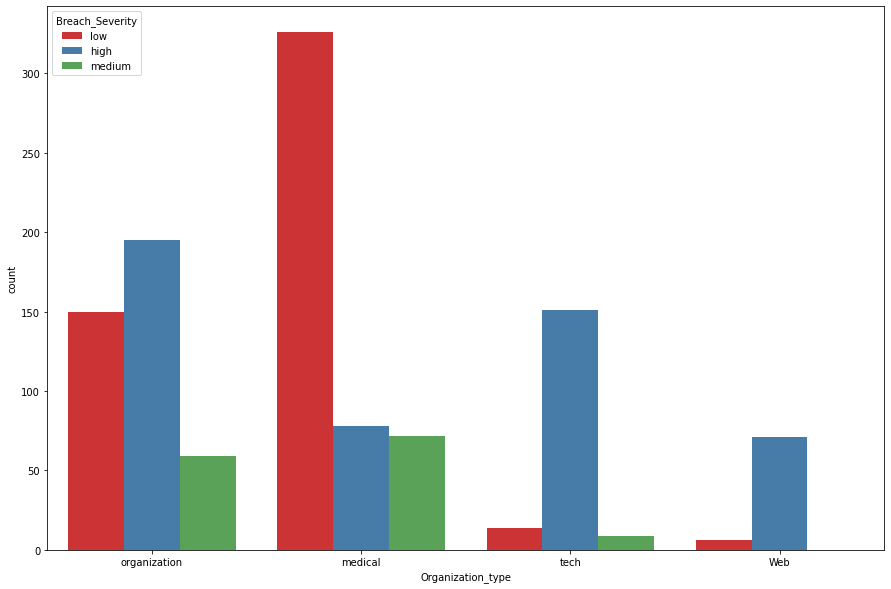

In [102]:
plt.figure(figsize=(15,10))
sns.countplot(x='Organization_type',hue='Breach_Severity',data=cyberdata,palette='Set1')

<AxesSubplot:xlabel='Year', ylabel='count'>

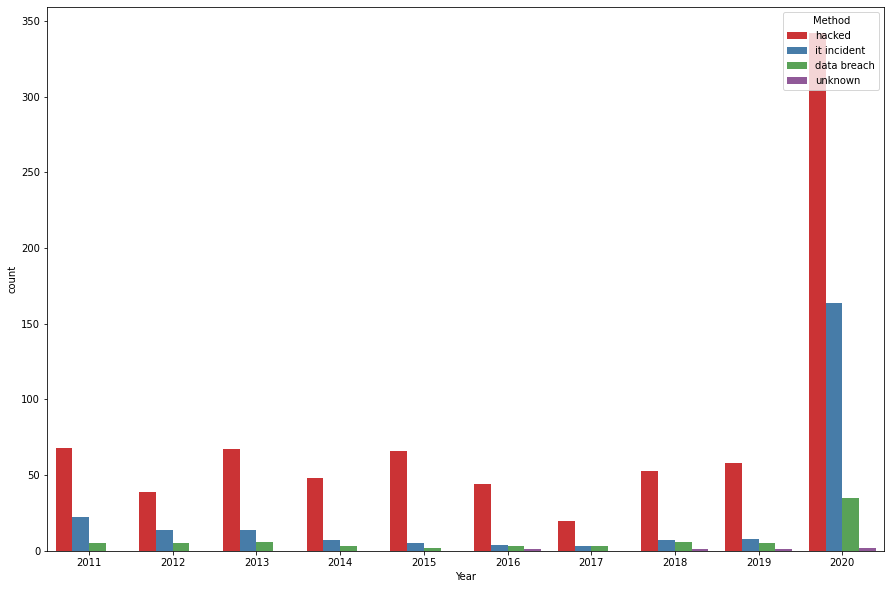

In [103]:
plt.figure(figsize=(15,10))
sns.countplot(x='Year',hue='Method',data=cyberdata,palette='Set1')

In [104]:
le=LabelEncoder()
df['Organization_type']=le.fit_transform(cyberdata['Organization_type'])
df['Method']=le.fit_transform(cyberdata['Method'])
df

,Company,Year,Records,Organization_type,Method,Breach_Severity
0,Henry Ford Health System,2011,500,2,1,low
1,VA Corporate Data Center Operations/Austin Inf...,2011,7029,1,1,low
2,Burlington Northern Santa Fe Group Benefits Plan,2011,507,1,1,low
3,Graybill Medical Group,2011,1863,1,1,low
4,Tampa General Hospital,2011,675,1,1,low
...,...,...,...,...,...,...
1126,AgusiQ-Torrents.pl,2020,9047800,0,1,high
1127,Adobe Inc.,2020,750000000,3,2,high
1128,3fun,2020,150000000,0,2,high
1129,1to1help,2020,30000000,1,2,high


# Decision Tree

In [105]:
x=df.iloc[:,[1,2,3,4]]
y=df.iloc[:, 5]

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)

In [107]:
x_test

,Year,Records,Organization_type,Method
695,2020,44000,2,1
484,2018,1386,2,1
615,2020,6302,1,0
452,2018,1782,1,2
698,2020,5000,1,2
...,...,...,...,...
930,2020,6300000,2,1
572,2019,106000000,2,1
878,2020,400000,2,1
871,2020,600,1,1


In [108]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
y_pred

array(['medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'medium', 'high', 'high', 'medium', 'low', 'low', 'low', 'high',
       'high', 'low', 'medium', 'low', 'medium', 'high', 'high', 'high',
       'high', 'medium', 'high', 'low', 'low', 'high', 'low', 'medium',
       'high', 'high', 'low', 'high', 'medium', 'medium', 'low', 'medium',
       'low', 'low', 'low', 'high', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'high', 'low', 'high', 'low', 'high', 'high',
       'medium', 'low', 'high', 'high', 'low', 'high', 'high', 'low',
       'low', 'high', 'high', 'low', 'high', 'medium', 'low', 'medium',
       'high', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'medium', 'medium', 'high', 'high',
       'high', 'high', 'high', 'medium', 'medium', 'medium', 'low',
       'high', 'high', 'high', 'medium', 'high', 'high', 'low', 'high',
       'high', 'low', 'medium', 'high', 'high', 'low', 'low', 'low'

In [109]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9970588235294118

In [110]:
#df1=x_test
#df1['orginal_Value']=y_test
#df1['predict_value']=y_pred
#df1

In [111]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

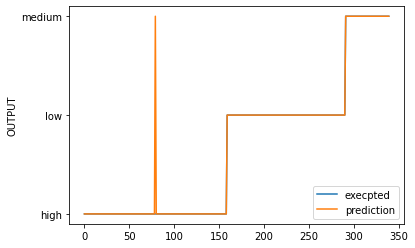

In [112]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# Random Forest

In [113]:
x=df.iloc[:,[1,2,3,4]]
y=df.iloc[:, 5]

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)

In [115]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
y_pred

array(['medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'medium', 'high', 'high', 'medium', 'low', 'low', 'low', 'high',
       'high', 'low', 'medium', 'low', 'medium', 'high', 'high', 'high',
       'high', 'medium', 'high', 'low', 'low', 'high', 'low', 'medium',
       'high', 'high', 'low', 'high', 'medium', 'medium', 'low', 'medium',
       'low', 'low', 'low', 'high', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'high', 'low', 'high', 'low', 'high', 'high',
       'medium', 'low', 'high', 'high', 'low', 'high', 'high', 'low',
       'low', 'high', 'high', 'low', 'high', 'medium', 'low', 'medium',
       'high', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'medium', 'medium', 'high', 'high',
       'high', 'high', 'high', 'medium', 'medium', 'medium', 'low',
       'high', 'high', 'high', 'medium', 'high', 'high', 'low', 'high',
       'high', 'low', 'medium', 'high', 'high', 'low', 'low', 'low'

In [116]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9970588235294118

In [117]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

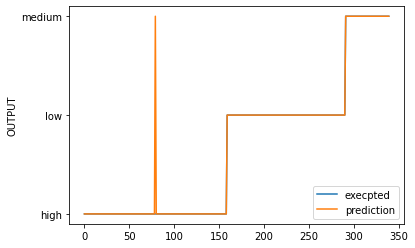

In [118]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

In [25]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer =TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False,use_idf=True, 
                       # smooth_idf=True).fit_transform(x)


# KNN

In [119]:
x=df.iloc[:,[1,2,3,4]]
y=df.iloc[:, 5]

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)

In [121]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
y_pred

array(['medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'medium', 'high', 'high', 'medium', 'low', 'low', 'low', 'high',
       'high', 'low', 'low', 'low', 'medium', 'high', 'high', 'high',
       'high', 'medium', 'high', 'low', 'low', 'high', 'low', 'medium',
       'high', 'high', 'low', 'high', 'medium', 'medium', 'low', 'medium',
       'low', 'low', 'low', 'high', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'high', 'low', 'high', 'low', 'high', 'high',
       'medium', 'low', 'high', 'high', 'low', 'high', 'high', 'low',
       'low', 'high', 'high', 'low', 'high', 'medium', 'low', 'medium',
       'high', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'medium', 'medium', 'high', 'high',
       'high', 'high', 'high', 'medium', 'medium', 'medium', 'low',
       'high', 'high', 'high', 'medium', 'high', 'high', 'low', 'high',
       'high', 'low', 'medium', 'high', 'high', 'low', 'low', 'low',
 

In [122]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9911764705882353

In [123]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

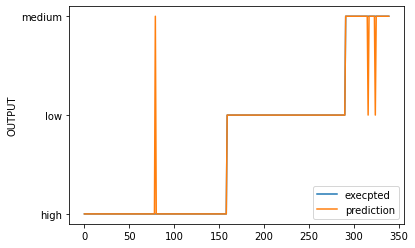

In [124]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# NB

In [130]:
x=df.iloc[:,[1,2,3,4]]
y=df.iloc[:, 5]

In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)

In [132]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array(['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'low', 'low', 'low', 'low', 'low', 'high', 'high', 'high', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'high', 'high', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'low', 'low', 'high', 'low', 'low', 'high', 'low',
       'high', 'low', 'high', 'high', 'low', 'low', 'high', 'low', 'low',
       'low', 'high', 'low', 'low', 'high', 'low', 'low', 'high', 'low',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'high', 'high',
       'high', 'high', 'high', 'high', 'low', 'low', 'low', 'high',
       'high', 'high', 'low', 'high', 'low', 'low', 'low', 'low', 'high',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low', 'low',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'high', 'low', 'low', 'high', 'l

In [133]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.7176470588235294

In [134]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

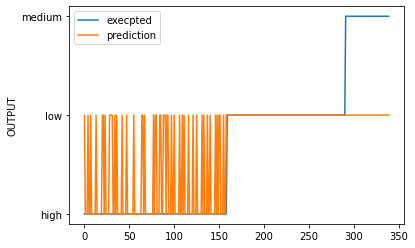

In [135]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# Adaboost

In [136]:
x=df.iloc[:,[1,2,3,4]]
y=df.iloc[:, 5]

In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)

In [138]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array(['medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'medium', 'high', 'high', 'medium', 'low', 'low', 'low', 'high',
       'high', 'low', 'medium', 'low', 'medium', 'high', 'high', 'high',
       'high', 'medium', 'high', 'low', 'low', 'high', 'low', 'medium',
       'high', 'high', 'low', 'high', 'medium', 'medium', 'low', 'medium',
       'low', 'low', 'low', 'high', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'high', 'low', 'high', 'low', 'high', 'high',
       'medium', 'low', 'high', 'high', 'low', 'high', 'high', 'low',
       'low', 'high', 'high', 'low', 'high', 'medium', 'low', 'medium',
       'high', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'medium', 'medium', 'high', 'high',
       'high', 'high', 'high', 'medium', 'medium', 'medium', 'low',
       'high', 'high', 'high', 'medium', 'high', 'high', 'low', 'high',
       'high', 'low', 'medium', 'high', 'high', 'low', 'low', 'low'

In [139]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9970588235294118

In [140]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

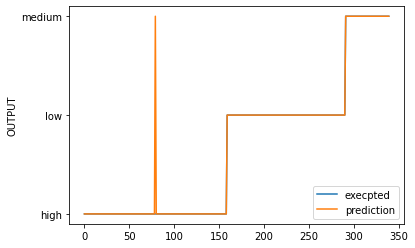

In [141]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# LR

In [142]:
x=df.iloc[:,[1,2,3,4]]
y=df.iloc[:, 5]

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)

In [144]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred

c:\users\riaju\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'medium', 'high', 'high', 'medium', 'low', 'low', 'low', 'high',
       'high', 'low', 'medium', 'low', 'medium', 'high', 'high', 'high',
       'high', 'medium', 'high', 'low', 'low', 'high', 'low', 'medium',
       'high', 'high', 'low', 'high', 'medium', 'medium', 'low', 'medium',
       'low', 'low', 'low', 'high', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'high', 'low', 'high', 'low', 'high', 'high',
       'medium', 'low', 'high', 'high', 'low', 'high', 'high', 'low',
       'low', 'high', 'high', 'low', 'high', 'medium', 'low', 'medium',
       'high', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'medium', 'medium', 'high', 'high',
       'high', 'high', 'high', 'medium', 'medium', 'medium', 'low',
       'high', 'high', 'high', 'medium', 'high', 'high', 'low', 'high',
       'high', 'low', 'medium', 'high', 'high', 'low', 'low', 'low'

In [145]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9970588235294118

In [146]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

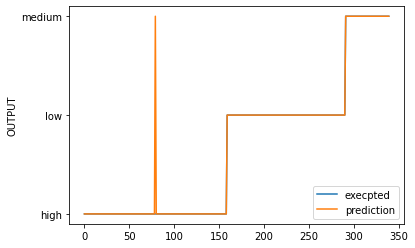

In [147]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# 2011-2019

In [151]:
cyberdataf = pd.read_csv('cydata.csv',encoding='latin-1')
cyberdataf = cyberdataf.replace(np.nan, 0, regex=True)
cyberdataf['Records'] =cyberdataf['Records'].str.replace(r'[^\w\s]+','')
cyberdataf['Records'] =cyberdataf['Records'].str.replace(r' ','')
cyberdataf['Records']=cyberdataf['Records'].astype('int64')
cyberdataf['Organization_type'].replace({'information technology':'tech','Telecoms':'tech','Tech':'tech',' tech':'tech','techmunications':'tech','Airline':'organization','Retail':'organization','Financial':'organization','Education':'organization','academic':'organization','government':'organization','government':'organization','Government':'organization','Hospitality':'organization','mobile carrier':'organization','advertising':'organization','consulting, accounting':'organization','teching':'organization','military':'organization','Healthcare':'medical','App':'Web','Automobile':'Web','Gaming':'Web','Other':'Web'}, inplace=True)
cyberdataf["Method"].replace({"lost": 'hacked','poor security':'hacked','Hacking/IT Incident':'hacked','Oops':'hacked','Hacked':'hacked','theft':'hacked','Third-party':'hacked','Theft':'hacked','Loss':'hacked','poor security/inside job':'hacked','unsecured S3 bucket':'hacked','Insider Job':'hacked','inside job, hacked':'hacked','poor security / hacked':'hacked','misconfiguration/poor security':'hacked','Unauthorized access':'hacked','lost / stolen media':'it incident','lost / stolen computer':'it incident','Misconfiguration':'it incident','unprotected api':'it incident','accidentally published':'it incident','accidentally uploaded':'it incident','accidentally exposed':'it incident','social engineering':'it incident','data exposed by misconfiguration':'data breach','inside job':'data breach'}, inplace=True)
cyberdataf['Organization_type'] = pd.to_numeric(cyberdataf['Organization_type'], errors='ignore')
cyberdataf=cyberdataf.iloc[::-1].reset_index(drop=True)
cyberdataf['Breach_Severity']= np.where(cyberdataf.Records <=10000, 'low',np.where(cyberdataf.Records <=100000, 'medium','high'))
cyberdataf=cyberdataf[cyberdataf.Year <=2019]
cyberdataf

,Company,Year,Records,Organization_type,Method,Breach_Severity
0,Henry Ford Health System,2011,500,organization,hacked,low
1,VA Corporate Data Center Operations/Austin Inf...,2011,7029,medical,hacked,low
2,Burlington Northern Santa Fe Group Benefits Plan,2011,507,medical,hacked,low
3,Graybill Medical Group,2011,1863,medical,hacked,low
4,Tampa General Hospital,2011,675,medical,hacked,low
...,...,...,...,...,...,...
583,Facebook,2019,540000000,tech,hacked,high
584,ElasticSearch,2019,108000000,tech,hacked,high
585,Woodruff Arts Center,2019,0,organization,hacked,low
586,Universiti Teknologi MARA,2019,1164540,organization,hacked,high


<AxesSubplot:xlabel='Organization_type', ylabel='count'>

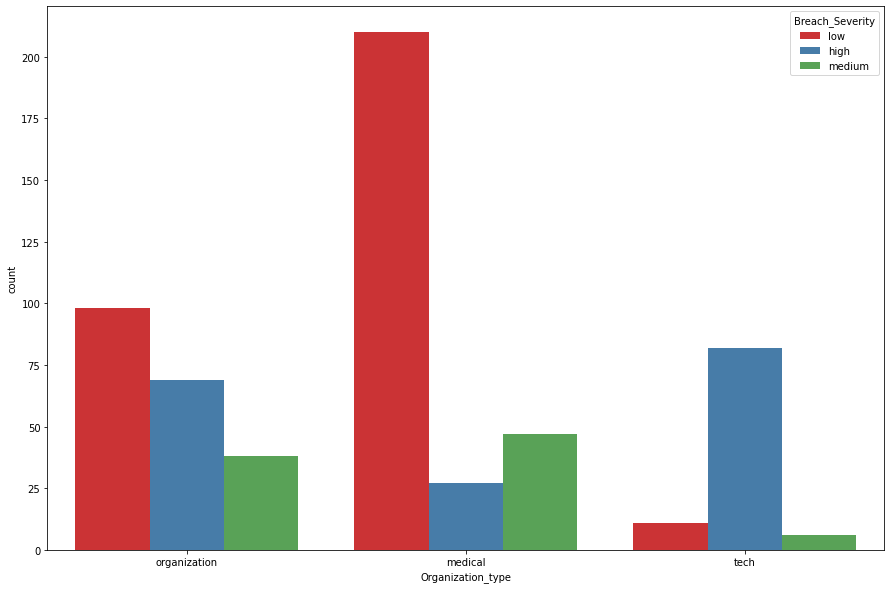

In [152]:
plt.figure(figsize=(15,10))
sns.countplot(x='Organization_type',hue='Breach_Severity',data=cyberdataf,palette='Set1')

<AxesSubplot:xlabel='Organization_type', ylabel='count'>

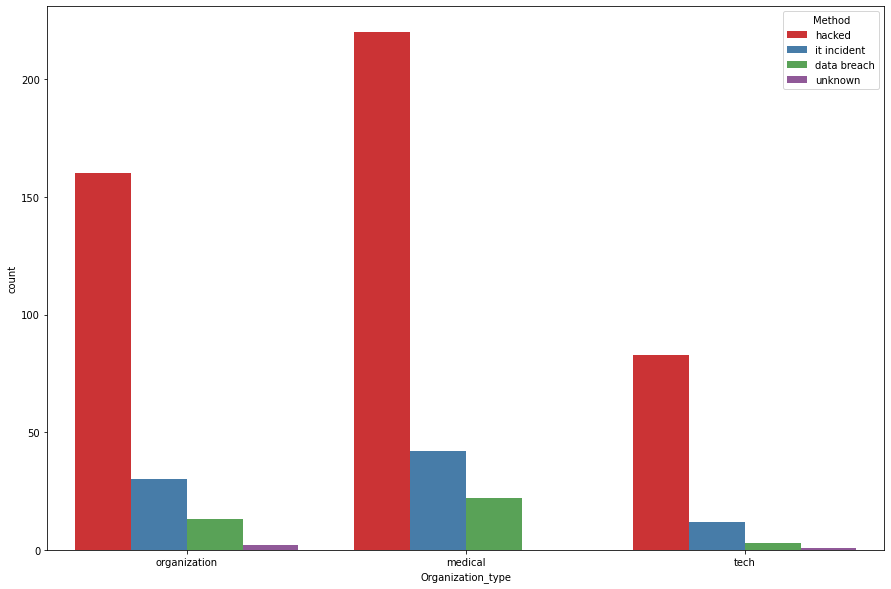

In [153]:
plt.figure(figsize=(15,10))
sns.countplot(x='Organization_type',hue='Method',data=cyberdataf,palette='Set1')

In [154]:
le=LabelEncoder()
cyberdataf['Organization_type']=le.fit_transform(cyberdataf['Organization_type'])
cyberdataf['Method']=le.fit_transform(cyberdataf['Method'])
cyberdataf

,Company,Year,Records,Organization_type,Method,Breach_Severity
0,Henry Ford Health System,2011,500,1,1,low
1,VA Corporate Data Center Operations/Austin Inf...,2011,7029,0,1,low
2,Burlington Northern Santa Fe Group Benefits Plan,2011,507,0,1,low
3,Graybill Medical Group,2011,1863,0,1,low
4,Tampa General Hospital,2011,675,0,1,low
...,...,...,...,...,...,...
583,Facebook,2019,540000000,2,1,high
584,ElasticSearch,2019,108000000,2,1,high
585,Woodruff Arts Center,2019,0,1,1,low
586,Universiti Teknologi MARA,2019,1164540,1,1,high


# DT

In [155]:
x=cyberdataf.iloc[:,[1,2,3,4]]
y=cyberdataf.iloc[:, 5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
y_pred

array(['high', 'high', 'low', 'medium', 'low', 'low', 'low', 'low', 'low',
       'low', 'medium', 'medium', 'high', 'medium', 'low', 'medium',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'high', 'high', 'low', 'high', 'high', 'medium',
       'low', 'low', 'low', 'high', 'medium', 'medium', 'low', 'low',
       'low', 'medium', 'low', 'low', 'high', 'high', 'medium', 'low',
       'low', 'high', 'low', 'low', 'medium', 'low', 'high', 'high',
       'low', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'medium', 'high', 'high', 'low', 'low', 'high', 'low', 'low',
       'high', 'low', 'low', 'low', 'high', 'high', 'medium', 'low',
       'high', 'low', 'high', 'low', 'high', 'low', 'low', 'high', 'low',
       'high', 'medium', 'low', 'high', 'high', 'low', 'low', 'low',
       'low', 'high', 'high', 'medium', 'high', 'high', 'low', 'medium',
       'high', 'high', 'low', 'low', 'low', 'medium', 'low', 'low',
       'high', '

In [156]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9774011299435028

In [157]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

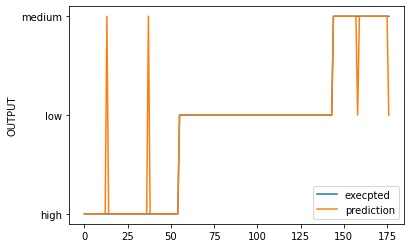

In [158]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# RF

In [159]:
x=cyberdataf.iloc[:,[1,2,3,4]]
y=cyberdataf.iloc[:, 5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
y_pred

array(['high', 'high', 'low', 'medium', 'low', 'low', 'low', 'low', 'low',
       'low', 'medium', 'medium', 'high', 'medium', 'low', 'medium',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'high', 'high', 'low', 'high', 'high', 'medium',
       'low', 'low', 'low', 'high', 'medium', 'medium', 'low', 'low',
       'low', 'medium', 'low', 'low', 'high', 'high', 'medium', 'low',
       'low', 'high', 'low', 'low', 'medium', 'low', 'high', 'high',
       'low', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'medium', 'high', 'high', 'low', 'low', 'high', 'low', 'low',
       'high', 'low', 'low', 'low', 'high', 'high', 'medium', 'low',
       'high', 'low', 'high', 'low', 'high', 'low', 'low', 'high', 'low',
       'high', 'medium', 'low', 'high', 'high', 'low', 'low', 'low',
       'low', 'high', 'high', 'medium', 'high', 'high', 'low', 'medium',
       'high', 'high', 'low', 'low', 'low', 'medium', 'low', 'low',
       'high', '

In [160]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9717514124293786

In [161]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

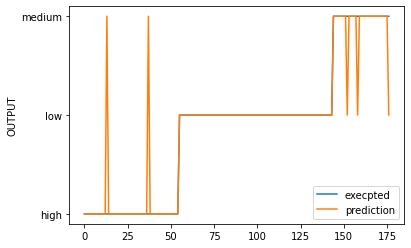

In [162]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# NB

In [163]:
x=cyberdataf.iloc[:,[1,2,3,4]]
y=cyberdataf.iloc[:, 5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array(['high', 'high', 'low', 'medium', 'low', 'low', 'low', 'low', 'low',
       'low', 'medium', 'low', 'high', 'medium', 'low', 'medium', 'high',
       'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'high', 'high', 'low', 'high', 'high', 'low', 'low', 'low',
       'low', 'high', 'low', 'medium', 'low', 'low', 'low', 'medium',
       'low', 'low', 'medium', 'high', 'low', 'low', 'low', 'high', 'low',
       'low', 'medium', 'low', 'high', 'high', 'low', 'low', 'low',
       'high', 'high', 'low', 'low', 'high', 'medium', 'high', 'high',
       'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low',
       'high', 'high', 'low', 'low', 'high', 'low', 'high', 'low', 'high',
       'low', 'low', 'high', 'low', 'high', 'medium', 'low', 'high',
       'high', 'low', 'low', 'low', 'low', 'high', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'high', 'low', 'low', 'low',
       'medium', 'low', 'low', 'high', 'high', 'medium', 'high', '

In [164]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.8983050847457628

In [165]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

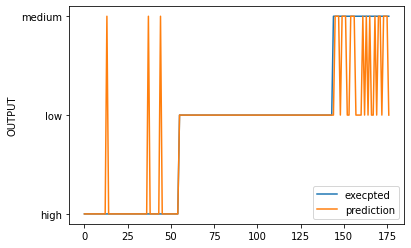

In [166]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# KNN

In [167]:
x=cyberdataf.iloc[:,[1,2,3,4]]
y=cyberdataf.iloc[:, 5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
y_pred

array(['high', 'high', 'low', 'medium', 'low', 'low', 'low', 'low', 'low',
       'low', 'medium', 'medium', 'high', 'medium', 'low', 'medium',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'high', 'high', 'low', 'high', 'high', 'medium',
       'low', 'low', 'low', 'high', 'medium', 'medium', 'low', 'low',
       'low', 'medium', 'low', 'low', 'high', 'high', 'medium', 'low',
       'low', 'high', 'low', 'low', 'medium', 'low', 'high', 'high',
       'low', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'medium', 'high', 'high', 'low', 'low', 'high', 'low', 'low',
       'high', 'low', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'low', 'high', 'low', 'high', 'low', 'low', 'high', 'low', 'high',
       'medium', 'low', 'high', 'high', 'low', 'low', 'low', 'low',
       'high', 'high', 'medium', 'high', 'high', 'low', 'low', 'high',
       'high', 'low', 'low', 'low', 'medium', 'low', 'low', 'high',
       'high',

In [168]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9548022598870056

In [169]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

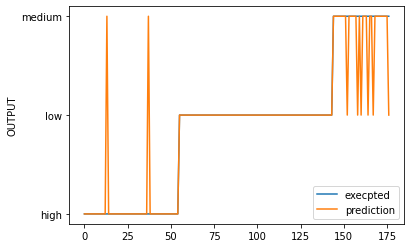

In [170]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# Ada

In [171]:
x=cyberdataf.iloc[:,[1,2,3,4]]
y=cyberdataf.iloc[:, 5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100,learning_rate=1)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array(['high', 'high', 'low', 'medium', 'low', 'low', 'low', 'low', 'low',
       'low', 'medium', 'medium', 'high', 'medium', 'low', 'medium',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'high', 'high', 'low', 'high', 'high', 'medium',
       'low', 'low', 'low', 'high', 'medium', 'medium', 'low', 'low',
       'low', 'medium', 'low', 'low', 'high', 'high', 'medium', 'low',
       'low', 'high', 'low', 'low', 'medium', 'low', 'high', 'high',
       'low', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'medium', 'high', 'high', 'low', 'low', 'high', 'low', 'low',
       'high', 'low', 'low', 'low', 'high', 'high', 'medium', 'low',
       'high', 'low', 'high', 'low', 'high', 'low', 'low', 'high', 'low',
       'high', 'medium', 'low', 'high', 'high', 'low', 'low', 'low',
       'low', 'high', 'high', 'medium', 'high', 'high', 'low', 'medium',
       'high', 'high', 'low', 'low', 'low', 'medium', 'low', 'low',
       'high', '

In [172]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9774011299435028

In [173]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

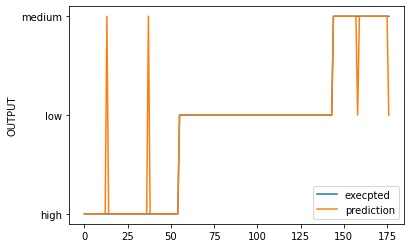

In [174]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# LR

In [175]:
x=cyberdataf.iloc[:,[1,2,3,4]]
y=cyberdataf.iloc[:, 5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred

array(['high', 'high', 'low', 'medium', 'low', 'low', 'low', 'low', 'low',
       'low', 'medium', 'medium', 'high', 'medium', 'low', 'medium',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'high', 'high', 'low', 'high', 'high', 'medium',
       'low', 'low', 'low', 'high', 'medium', 'medium', 'low', 'low',
       'low', 'medium', 'low', 'low', 'high', 'high', 'medium', 'low',
       'low', 'high', 'low', 'low', 'medium', 'low', 'high', 'high',
       'low', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'medium', 'high', 'high', 'low', 'low', 'high', 'low', 'low',
       'high', 'low', 'low', 'low', 'high', 'high', 'medium', 'low',
       'high', 'low', 'high', 'low', 'high', 'low', 'low', 'high', 'low',
       'high', 'medium', 'low', 'high', 'high', 'low', 'low', 'low',
       'low', 'high', 'high', 'medium', 'high', 'high', 'low', 'medium',
       'high', 'high', 'low', 'low', 'low', 'medium', 'low', 'low',
       'high', '

In [176]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9717514124293786

In [177]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

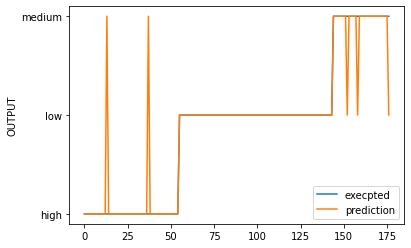

In [178]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# 2020

In [179]:
cyberdatad = pd.read_csv('cydata.csv',encoding='latin-1')
cyberdatad = cyberdatad.replace(np.nan, 0, regex=True)
cyberdatad['Records'] =cyberdatad['Records'].str.replace(r'[^\w\s]+','')
cyberdatad['Records'] =cyberdatad['Records'].str.replace(r' ','')
cyberdatad['Records']=cyberdatad['Records'].astype('int64')
cyberdatad['Organization_type'].replace({'information technology':'tech','Telecoms':'tech','Tech':'tech',' tech':'tech','techmunications':'tech','Airline':'organization','Retail':'organization','Financial':'organization','Education':'organization','academic':'organization','government':'organization','government':'organization','Government':'organization','Hospitality':'organization','mobile carrier':'organization','advertising':'organization','consulting, accounting':'organization','teching':'organization','military':'organization','Healthcare':'medical','App':'Web','Automobile':'Web','Gaming':'Web','Other':'Web'}, inplace=True)
cyberdatad["Method"].replace({"lost": 'hacked','poor security':'hacked','Hacking/IT Incident':'hacked','Oops':'hacked','Hacked':'hacked','theft':'hacked','Third-party':'hacked','Theft':'hacked','Loss':'hacked','poor security/inside job':'hacked','unsecured S3 bucket':'hacked','Insider Job':'hacked','inside job, hacked':'hacked','poor security / hacked':'hacked','misconfiguration/poor security':'hacked','Unauthorized access':'hacked','lost / stolen media':'it incident','lost / stolen computer':'it incident','Misconfiguration':'it incident','unprotected api':'it incident','accidentally published':'it incident','accidentally uploaded':'it incident','accidentally exposed':'it incident','social engineering':'it incident','data exposed by misconfiguration':'data breach','inside job':'data breach'}, inplace=True)
cyberdatad['Organization_type'] = pd.to_numeric(cyberdatad['Organization_type'], errors='ignore')
cyberdatad=cyberdatad.iloc[::-1].reset_index(drop=True)
cyberdatad['Breach_Severity']= np.where(cyberdatad.Records <=10000, 'low',np.where(cyberdatad.Records <=100000, 'medium','high'))
cyberdatad=cyberdatad[cyberdatad.Year == 2020]
cyberdatad

,Company,Year,Records,Organization_type,Method,Breach_Severity
588,Saint Louis County Department of Health,2020,4000,medical,hacked,low
589,Northwestern Memorial HealthCare,2020,16025,organization,hacked,medium
590,Mercy Medical Center Redding - Oncology Clinic...,2020,21000,medical,hacked,medium
591,Walgreen Co.,2020,160000,organization,hacked,high
592,Clay County Hospital,2020,12621,medical,hacked,medium
...,...,...,...,...,...,...
1126,AgusiQ-Torrents.pl,2020,9047800,Web,hacked,high
1127,Adobe Inc.,2020,750000000,tech,it incident,high
1128,3fun,2020,150000000,Web,it incident,high
1129,1to1help,2020,30000000,medical,it incident,high


<AxesSubplot:xlabel='Organization_type', ylabel='count'>

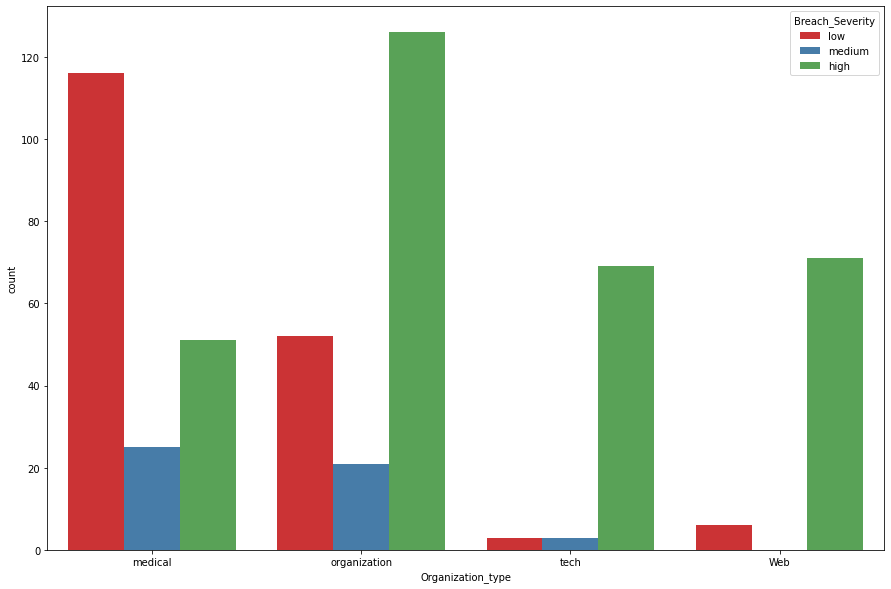

In [180]:
plt.figure(figsize=(15,10))
sns.countplot(x='Organization_type',hue='Breach_Severity',data=cyberdatad,palette='Set1')

<AxesSubplot:xlabel='Organization_type', ylabel='count'>

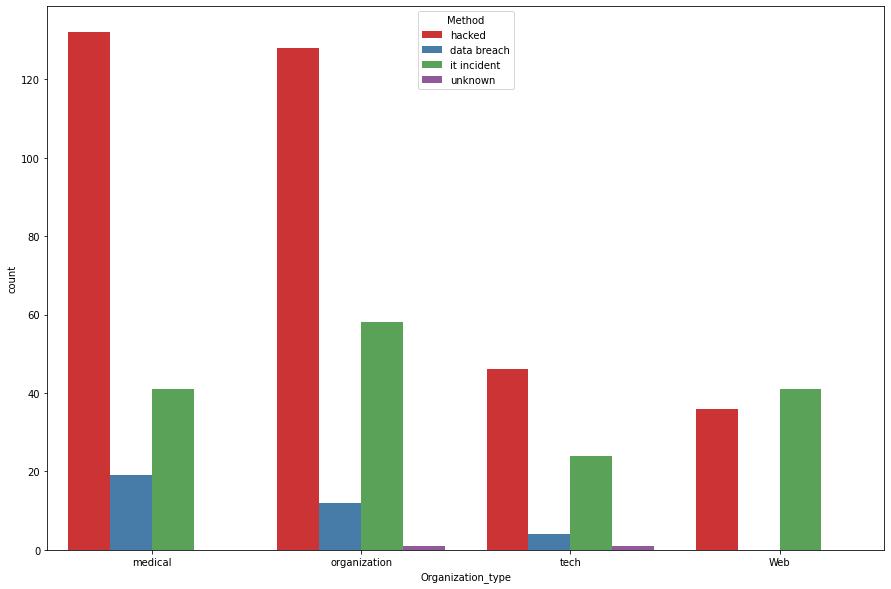

In [181]:
plt.figure(figsize=(15,10))
sns.countplot(x='Organization_type',hue='Method',data=cyberdatad,palette='Set1')

In [182]:
le=LabelEncoder()
cyberdatad['Organization_type']=le.fit_transform(cyberdatad['Organization_type'])
cyberdatad['Method']=le.fit_transform(cyberdatad['Method'])
cyberdatad

,Company,Year,Records,Organization_type,Method,Breach_Severity
588,Saint Louis County Department of Health,2020,4000,1,1,low
589,Northwestern Memorial HealthCare,2020,16025,2,1,medium
590,Mercy Medical Center Redding - Oncology Clinic...,2020,21000,1,1,medium
591,Walgreen Co.,2020,160000,2,1,high
592,Clay County Hospital,2020,12621,1,1,medium
...,...,...,...,...,...,...
1126,AgusiQ-Torrents.pl,2020,9047800,0,1,high
1127,Adobe Inc.,2020,750000000,3,2,high
1128,3fun,2020,150000000,0,2,high
1129,1to1help,2020,30000000,1,2,high


# DT

In [183]:
x=cyberdatad.iloc[:,[1,2,3,4]]
y=cyberdatad.iloc[:, 5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
y_pred

array(['high', 'high', 'high', 'high', 'high', 'high', 'medium', 'high',
       'high', 'high', 'high', 'medium', 'high', 'high', 'low', 'high',
       'medium', 'low', 'medium', 'high', 'medium', 'high', 'high',
       'medium', 'high', 'high', 'high', 'high', 'low', 'high', 'high',
       'low', 'high', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'high', 'low', 'high', 'high', 'high', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'high', 'low', 'high', 'low', 'high', 'high', 'high', 'high',
       'medium', 'high', 'medium', 'high', 'low', 'low', 'high', 'high',
       'high', 'high', 'high', 'medium', 'low', 'high', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'high', 'high', 'high', 'low', 'high', 'low', 'high', 'high',
       'high', 'low', 'medium', 'high', 'low', 'high', 'high', 'high',
       '

In [184]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9938650306748467

In [185]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

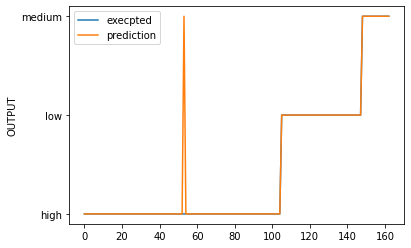

In [186]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# RF

In [187]:
x=cyberdatad.iloc[:,[1,2,3,4]]
y=cyberdatad.iloc[:, 5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
y_pred

array(['high', 'high', 'high', 'high', 'high', 'high', 'medium', 'high',
       'high', 'high', 'high', 'medium', 'high', 'high', 'low', 'high',
       'medium', 'low', 'medium', 'high', 'medium', 'high', 'high',
       'medium', 'high', 'high', 'high', 'high', 'low', 'high', 'high',
       'low', 'high', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'high', 'low', 'high', 'high', 'high', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'high', 'low', 'high', 'low', 'high', 'high', 'high', 'high',
       'medium', 'high', 'medium', 'high', 'low', 'low', 'high', 'high',
       'high', 'high', 'high', 'medium', 'low', 'high', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'high', 'high', 'high', 'low', 'high', 'low', 'high', 'high',
       'high', 'low', 'medium', 'high', 'low', 'high', 'high', 'high',
       '

In [188]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9938650306748467

In [189]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

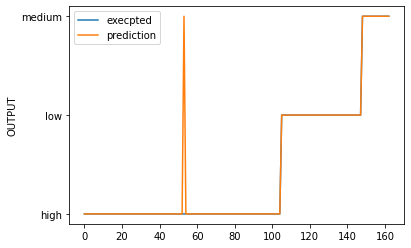

In [190]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# NB

In [191]:
x=cyberdatad.iloc[:,[1,2,3,4]]
y=cyberdatad.iloc[:, 5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array(['high', 'high', 'high', 'high', 'high', 'high', 'low', 'high',
       'high', 'high', 'high', 'low', 'high', 'low', 'low', 'high', 'low',
       'low', 'low', 'high', 'low', 'low', 'high', 'low', 'high', 'low',
       'high', 'high', 'low', 'high', 'low', 'low', 'high', 'low', 'low',
       'low', 'high', 'high', 'low', 'low', 'low', 'high', 'low', 'low',
       'high', 'high', 'low', 'high', 'low', 'high', 'low', 'high', 'low',
       'high', 'high', 'high', 'low', 'high', 'high', 'low', 'high',
       'high', 'low', 'high', 'low', 'high', 'low', 'high', 'low', 'high',
       'high', 'high', 'low', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'high', 'high', 'high', 'high', 'low', 'low', 'high', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low',
       'high', 'high', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'high', 'low', 'high', 'low', 'high', 'high', 'low',
       'high', 'low', 'low', 'high', 'low', 'hi

In [192]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.7423312883435583

In [193]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

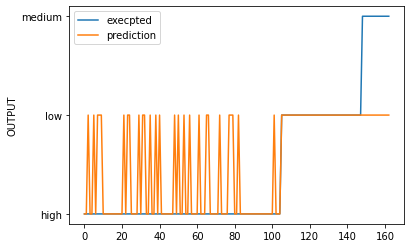

In [194]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# KNN

In [195]:
x=cyberdatad.iloc[:,[1,2,3,4]]
y=cyberdatad.iloc[:, 5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
y_pred

array(['high', 'high', 'high', 'high', 'high', 'high', 'medium', 'high',
       'high', 'high', 'high', 'medium', 'high', 'high', 'low', 'high',
       'medium', 'low', 'medium', 'high', 'medium', 'high', 'high',
       'medium', 'high', 'high', 'high', 'high', 'low', 'high', 'high',
       'low', 'high', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'high', 'low', 'high', 'high', 'high', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'high', 'low', 'high', 'low', 'high', 'high', 'high', 'high',
       'medium', 'high', 'medium', 'high', 'low', 'low', 'high', 'high',
       'high', 'high', 'high', 'medium', 'low', 'high', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'high', 'high', 'high', 'low', 'high', 'low', 'high', 'high',
       'high', 'low', 'medium', 'high', 'low', 'high', 'high', 'high',
       '

In [196]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

1.0

In [197]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

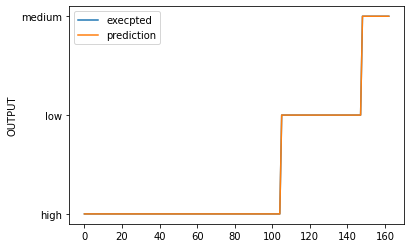

In [198]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# ADA

In [199]:
x=cyberdatad.iloc[:,[1,2,3,4]]
y=cyberdatad.iloc[:, 5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array(['high', 'high', 'high', 'high', 'high', 'high', 'medium', 'high',
       'high', 'high', 'high', 'medium', 'high', 'high', 'low', 'high',
       'medium', 'low', 'medium', 'high', 'medium', 'high', 'high',
       'medium', 'high', 'high', 'high', 'high', 'low', 'high', 'high',
       'low', 'high', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'high', 'low', 'high', 'high', 'high', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'high', 'low', 'high', 'low', 'high', 'high', 'high', 'high',
       'medium', 'high', 'medium', 'high', 'low', 'low', 'high', 'high',
       'high', 'high', 'high', 'medium', 'low', 'high', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'high', 'high', 'high', 'low', 'high', 'low', 'high', 'high',
       'high', 'low', 'medium', 'high', 'low', 'high', 'high', 'high',
       '

In [200]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9938650306748467

In [201]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

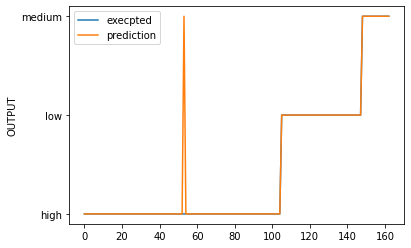

In [202]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)

# LR

In [203]:
x=cyberdatad.iloc[:,[1,2,3,4]]
y=cyberdatad.iloc[:, 5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 10)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred

array(['high', 'high', 'high', 'high', 'high', 'high', 'medium', 'high',
       'high', 'high', 'high', 'medium', 'high', 'high', 'low', 'high',
       'medium', 'low', 'medium', 'high', 'medium', 'high', 'high',
       'medium', 'high', 'high', 'high', 'high', 'low', 'high', 'high',
       'low', 'high', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'high', 'low', 'high', 'high', 'high', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'high', 'low', 'high', 'low', 'high', 'high', 'high', 'high',
       'medium', 'high', 'medium', 'high', 'low', 'low', 'high', 'high',
       'high', 'high', 'high', 'medium', 'low', 'high', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'high', 'high', 'high', 'low', 'high', 'low', 'high', 'high',
       'high', 'low', 'medium', 'high', 'low', 'high', 'high', 'high',
       '

In [204]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9938650306748467

In [205]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.show()

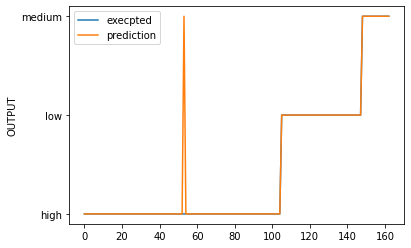

In [206]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
chart_regression(y_pred.flatten(),y_test)